In [25]:
import pandas as pd
from tqdm import tqdm

In [3]:
df = pd.read_csv('./laptop_price.csv')
df
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


1.1 Создать новый признак Cpu_Company, который будет содержать только название фирмы, которая произвела CPU (Intel, AMD и т.д)


1.2 Создать новый признак Memory_Amount, который будет содержать только количество Gb памяти без указания типа носителя (128, 1024, 256 и т.д.)
1.3 Создать новый признак Memory_Type, который будет содержать только тип носителя (HDD, SDD и т.д.)
1.4 Удалите признаки Memory и ScreenResolution

In [4]:
df['Cpu_Company'] = df['Cpu'].apply(lambda x: x.split()[0])
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Company
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel


In [5]:
df['Memory_Amount'] = df['Memory'].apply(lambda x: x.split()[0][:-2])
df['Memory_Amount'].value_counts()

Memory_Amount
256    508
1      240
128    177
512    140
500    132
32      45
64      17
2       16
1.0     10
16      10
180      5
240      1
8        1
508      1
Name: count, dtype: int64

In [6]:
df['Memory_Amount'] = df['Memory'].apply(lambda x: x.split()[0].replace("GB", ""))
df['Memory_Amount'].value_counts()

Memory_Amount
256      508
1TB      240
128      177
512      140
500      132
32        45
64        17
2TB       16
1.0TB     10
16        10
180        5
240        1
8          1
508        1
Name: count, dtype: int64

In [7]:
df['Memory_Amount'] = df['Memory'].apply(lambda x: x.split()[0].rstrip('GB'))
df['Memory_Amount'].value_counts()

Memory_Amount
256     508
1T      240
128     177
512     140
500     132
32       45
64       17
2T       16
1.0T     10
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [8]:
def convert_to_gb(x):
    memory = x.split()[0]
    if memory.endswith("GB"):
        res = memory.replace("GB", "")
    elif memory.endswith("TB"):
        res = float(memory.replace("TB", "")) * 1024
    return int(res)


df['Memory_Amount'] = df['Memory'].apply(convert_to_gb)
df['Memory_Amount'].value_counts()

Memory_Amount
256     508
1024    250
128     177
512     140
500     132
32       45
64       17
2048     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [9]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [10]:
def convert_to_type(x):
    type_memory = x.replace(" ", "").split("B")[-1]
    return type_memory


df['Memory_Type'] = df['Memory'].apply(convert_to_type)
df['Memory_Type'].value_counts()

Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

In [11]:
df.drop(columns=['Memory', 'ScreenResolution'], inplace=True)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128,FlashStorage
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,512,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,256,SSD


2.1 Создайте признак SSD, который изначально равен 0
2.2 Поставьте в признаке SSD 1, если ноутбук действительно с типом носителя SSD
2.3 Уберите в признаке Weight значения 'kg' и поменяйте его тип данных на вещественный

In [12]:
df['SSD'] = 0
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128,SSD,0
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128,FlashStorage,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256,SSD,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,512,SSD,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,256,SSD,0


In [13]:
df.loc[df['Memory_Type'] == 'SSD', 'SSD'] = 1
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel,128,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel,128,FlashStorage,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel,256,SSD,1
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel,512,SSD,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel,256,SSD,1


In [14]:
df['Weight'].value_counts()

Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [15]:
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Weight'] = df['Weight'].astype('float')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD,1
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD,1


Создайте датафрейм с клиентами:
clients = pd.DataFrame({
    'client_id': [45, 32, 67, 33, 43],
    'laptop_id': [506, 398, 710, 120, 1999]
})


laptop_id - это индексы датафрейма с ноутбуками
3.1 Присоедините к таблице clients данные по ноутбукам через метод join
3.2 Присоедините к таблице clients данные по ноутбукам через метод merge
Это нужно, чтобы понимать, какие ноутбуки покупались клиентами

In [16]:
clients = pd.DataFrame({
    'client_id': [45, 32, 67, 33, 43],
    'laptop_id': [506, 398, 710, 120, 1999]
})

joined_df = clients.join(df.set_index('laptop_ID'), on='laptop_id')
joined_df.head()


,client_id,laptop_id,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,45,506,Lenovo,ThinkPad L570,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,Windows 10,2.30,911.00,Intel,256.0,SSD,1.0
1,32,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67,710,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P 3.6GHz,8GB,AMD Radeon R7,Windows 10,2.20,429.00,AMD,1024.0,HDD,0.0
3,33,120,Dell,Inspiron 7570,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8GB,Nvidia GeForce 940MX,Windows 10,2.16,1130.33,Intel,256.0,HDD,0.0
4,43,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
clients_lap_id = clients.set_index('laptop_id')
clients_lap_id

joined = clients_lap_id.join(df)
joined

,client_id,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
laptop_id,,,,,,,,,,,,,,,,
506,45,513.0,Asus,ZenBook UX510UX-CN211T,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8GB,Intel HD Graphics 620,Windows 10,2.00,1224.0,Intel,256.0,HDD,0.0
398,32,405.0,Dell,Precision M5520,Workstation,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia Quadro M1200,Windows 10,1.78,2712.0,Intel,256.0,SSD,1.0
710,67,718.0,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,1249.0,Intel,128.0,HDD,0.0
120,33,123.0,Acer,Spin 3,Notebook,15.6,Intel Core i3 7100U 2.4GHz,6GB,Intel HD Graphics 620,Windows 10,2.10,479.0,Intel,1024.0,HDD,0.0
1999,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
joined_df2 = clients.merge(df, on='laptop_ID')
joined_df2.head()

KeyError: 'laptop_ID'

In [ ]:
df['laptop_id'] = df.index
df.head()

merged = clients.merge(df, on='laptop_id')
merged

,client_id,laptop_id,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Type_Memory,Memory_Amount,Memory_Type,SSD
0,45,506,513,Asus,ZenBook UX510UX-CN211T,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8GB,Intel HD Graphics 620,Windows 10,2.00,1224.0,Intel,SSD,256,HDD,0
1,32,398,405,Dell,Precision M5520,Workstation,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia Quadro M1200,Windows 10,1.78,2712.0,Intel,SSD,256,SSD,1
2,67,710,718,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,1249.0,Intel,SSD,128,HDD,0
3,33,120,123,Acer,Spin 3,Notebook,15.6,Intel Core i3 7100U 2.4GHz,6GB,Intel HD Graphics 620,Windows 10,2.10,479.0,Intel,HDD,1T,HDD,0


Составьте несколько сводных таблиц

4.1 Найдите среднюю стоимость ноутбуков в зависимости от компании производителя
Отсортируйте от меньшей стоимости к большей

4.2 Найдите минимальную, среднюю и максимальную стоимости ноутбуков в зависимости от производителя процессора

4.3 Постройте таблицу с подсчетом количества ноутбуков в данных в зависимости от производителя CPU и ОЗУ
4.4 Постройте таблицу с подсчетом средней стоимости ноутбуков в данных в зависимости от операционной системы и GB памяти

In [ ]:
# df[df['Company'].unique()].mean()

df.groupby('Company')['Price_euros'].mean().reset_index().sort_values('Price_euros')
df.groupby('Company').agg({"Price_euros": 'mean'}).sort_values('Price_euros')

# Сортировка по возрастанию средней стоимости
# sorted_prices = average_prices.sort_values('price')

,Company,Price_euros
17,Vero,217.425000
12,Mediacom,295.000000
3,Chuwi,314.296667
0,Acer,626.775825
5,Fujitsu,729.000000
7,HP,1067.774854
10,Lenovo,1086.384444
2,Asus,1104.169367
18,Xiaomi,1133.462500
4,Dell,1186.068990


In [ ]:
df.groupby('Cpu_Company')['Price_euros'].max()

Cpu_Company
AMD        2199.0
Intel      6099.0
Samsung     659.0
Name: Price_euros, dtype: float64

In [ ]:
df.groupby('Cpu_Company')['Price_euros'].mean()

Cpu_Company
AMD         560.638871
Intel      1152.214145
Samsung     659.000000
Name: Price_euros, dtype: float64

In [ ]:
df.groupby("Cpu_Company").agg({'Price_euros': ['min', 'mean', 'max']})

Price_euros                     
                    min         mean     max
Cpu_Company                                 
AMD               199.0   560.638871  2199.0
Intel             174.0  1152.214145  6099.0
Samsung           659.0   659.000000   659.0

In [ ]:
df.pivot_table(index='Cpu_Company', columns='Ram', values='Weight', aggfunc='count', fill_value=0)

Ram,12GB,16GB,24GB,2GB,32GB,4GB,64GB,6GB,8GB
Cpu_Company,,,,,,,,,
AMD,2,3,0,1,0,31,0,13,12
Intel,23,197,3,21,17,343,1,28,607
Samsung,0,0,0,0,0,1,0,0,0


In [ ]:
df.groupby(['OpSys', 'Memory_Amount']).agg({"Price_euros": "mean"}).unstack("Memory_Amount").fillna(0)

Price_euros                                                     
Memory_Amount        1.0T          128      16     180           1T     240   
OpSys                                                                         
Android            0.0000     0.000000    0.00     0.0     0.000000     0.0  \
Chrome OS          0.0000  1275.000000  305.38     0.0     0.000000     0.0   
Linux              0.0000   742.250000    0.00     0.0   581.401290     0.0   
Mac OS X           0.0000  1099.000000    0.00     0.0     0.000000     0.0   
No OS              0.0000   562.140000    0.00     0.0   540.539600     0.0   
Windows 10       755.5575  1026.489167    0.00  1073.5   911.353388  3100.0   
Windows 10 S       0.0000  1039.000000    0.00     0.0     0.000000     0.0   
Windows 7        860.0000  1320.323333    0.00  1199.0  2899.000000     0.0   
macOS              0.0000  1119.315000    0.00     0.0     0.000000     0.0   

                                                                       
Memory_Amount          256        2T          32         500     508   
OpSys                                                                  
Android           0.000000    0.0000    0.000000    0.000000     0.0  \
Chrome OS      1559.000000    0.0000  412.454545    0.000000     0.0   
Linux           811.638125    0.0000    0.000000  389.056364     0.0   
Mac OS X       1311.994000    0.0000    0.000000    0.000000     0.0   
No OS           782.989286  594.0000    0.000000  404.675385     0.0   
Windows 10     1334.456872  666.9475  270.001471  664.717647     0.0   
Windows 10 S   1668.950000    0.0000    0.000000    0.000000     0.0   
Windows 7      1846.466800    0.0000    0.000000  924.048333  1002.0   
macOS          1600.370000    0.0000    0.000000    0.000000     0.0   

                                                
Memory_Amount          512          64       8  
OpSys                                           
Android           0.000000  434.000000     0.0  
Chrome OS      2199.000000  774.333333     0.0  
Linux             0.000000    0.000000     0.0  
Mac OS X       1222.000000    0.000000     0.0  
No OS          1098.500000    0.000000     0.0  
Windows 10     1911.985285  499.716000  2249.0  
Windows 10 S   2589.000000  308.995000     0.0  
Windows 7      2235.396667    0.000000     0.0  
macOS          2180.870000    0.000000     0.0

Ответьте на несколько вопросов, используя методы группировки

5.1 Ноутбуков каких компаний и с каким процессором больше?

5.2 С каким типом памяти и с каким объемом памяти больше ноутбуков?

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Type_Memory,Memory_Amount,Memory_Type,SSD,laptop_id
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,SSD,128,SSD,1,0
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,Flash,128,FlashStorage,0,1
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,SSD,256,SSD,1,2
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,SSD,512,SSD,1,3
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,SSD,256,SSD,1,4


In [ ]:
count_cpu = df.groupby(['Company', 'Cpu_Company']).size().reset_index(name='count')

# Нахождение максимального количества ноутбуков по компаниям и процессорам
max_count = count_cpu['count'].max()

# Фильтрация для получения компаний и процессоров с максимальным количеством
count_cpu[count_cpu['count'] == max_count]



,Company,Cpu_Company,count
6,Dell,Intel,297


In [ ]:
pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,10,93,0
Apple,0,21,0
Asus,11,147,0
Chuwi,0,3,0
Dell,0,297,0
Fujitsu,0,3,0
Google,0,3,0
HP,25,249,0
Huawei,0,2,0


In [ ]:
count_cpu = df.groupby(['Company', 'Cpu_Company']).size().reset_index(name='count')
max_count = count_cpu['count'].max()
count_cpu[count_cpu['count'] == max_count]

,Company,Cpu_Company,count
6,Dell,Intel,297


In [19]:
pd.crosstab(index=df['Memory_Type'], columns=df['Memory_Amount'])

Memory_Amount,8,16,32,64,128,180,240,256,500,508,512,1024,2048
Memory_Type,,,,,,,,,,,,,
FlashStorage,0,7,38,15,4,0,0,8,0,0,2,0,0
HDD,0,0,1,1,97,0,0,85,132,0,17,227,16
Hybrid,0,0,0,0,0,0,0,1,0,1,1,9,0
SSD,1,3,6,1,76,5,1,414,0,0,120,14,0


<Axes: xlabel='Company'>

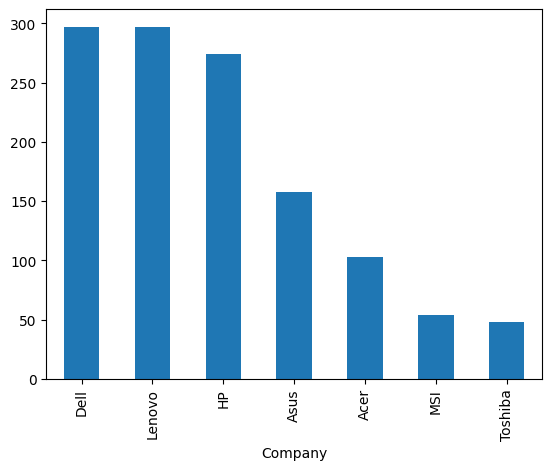

In [23]:
# d = df.groupby('Weight').mean()
# d.plot()

df['Company'].value_counts().head(7).plot.bar()

<Axes: >

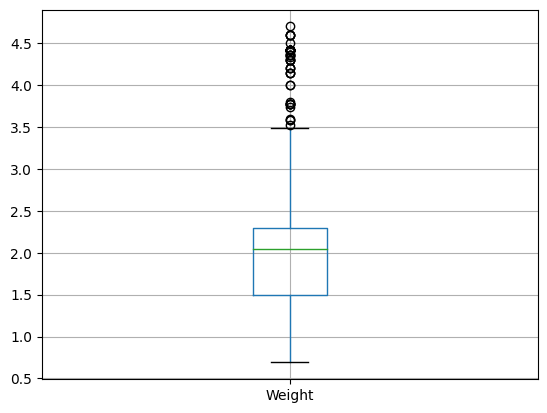

In [24]:
df.boxplot(column='Weight')

In [36]:
tqdm.pandas()
import time

def convert_e_r(x):
    # time.sleep(0.1)
    return x * 3.1

df['Price_r'] = df['Price_euros'].progress_apply(convert_e_r)
df.head()


100%|██████████| 1303/1303 [00:00<00:00, 1300304.10it/s]


,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD,Price_r
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD,1,4153.039
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage,0,2786.714
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD,1,1782.500
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD,1,7866.095
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD,1,5591.160


In [38]:
df.drop(columns=['Cpu_Company', 'Price_r'], inplace=True)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,128,FlashStorage,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,256,SSD,1
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,512,SSD,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,SSD,1


In [42]:
df['M'] = 0
df['M'] = df[df['Memory_Amount'] == '128']
df.head()

ValueError: Columns must be same length as key

In [43]:
df[df['Memory_Amount'] == '128']

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_Amount,Memory_Type,SSD,M
